**Introduction to data science standard project**

---


Used Kaggle dataset: https://www.kaggle.com/code/wordcards/stock-market-tweets-wordcloud/data


---

Milosh Kuzmanovski, 193114

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import strftime

df = pd.read_csv('/content/tweets_labelled_09042020_16072020.csv', sep=';')
df.dropna(subset= ['sentiment'], inplace=True)

In [5]:
df

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
...,...,...,...,...
1295,75519,2020-04-15 06:00:10+00:00,#stocks back from the recovery room: https://t...,positive
1296,739234,2020-07-01 11:29:10+00:00,RT @MacroCharts: Breadth – expanding last week...,positive
1297,254379,2020-04-29 02:21:50+00:00,RT @MawsonResource: Rompas-Rajapalot: A Big Ne...,neutral
1298,580441,2020-06-19 17:56:57+00:00,$AAPL $QQQ Top may now be in. https://t.co/iNK...,positive


Data Preprocessing

In [6]:
x= df.iloc[:,:-1].values

In [7]:
y= df.iloc[:,3].values

In [8]:
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder()
y= le_y.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

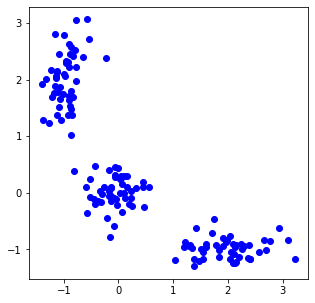

In [10]:
%matplotlib inline

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')

Clustering

In [ ]:
pip install transformers

In [12]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [13]:
df

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
...,...,...,...,...
1295,75519,2020-04-15 06:00:10+00:00,#stocks back from the recovery room: https://t...,positive
1296,739234,2020-07-01 11:29:10+00:00,RT @MacroCharts: Breadth – expanding last week...,positive
1297,254379,2020-04-29 02:21:50+00:00,RT @MawsonResource: Rompas-Rajapalot: A Big Ne...,neutral
1298,580441,2020-06-19 17:56:57+00:00,$AAPL $QQQ Top may now be in. https://t.co/iNK...,positive


In [14]:
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(df.text.values)

In [15]:
message_embeddings

<tf.Tensor: shape=(1300, 512), dtype=float32, numpy=
array([[ 6.1971478e-02, -9.2812680e-02, -1.8878261e-02, ...,
         3.5635389e-02, -7.3866844e-02, -1.3540632e-02],
       [ 4.5175396e-02, -2.9676385e-02,  3.8540096e-03, ...,
        -1.6554518e-02, -5.6342948e-02, -7.4437723e-02],
       [ 1.4715094e-02, -6.3616864e-02, -7.0289023e-02, ...,
        -5.9104223e-05,  1.1198695e-02,  9.5631490e-03],
       ...,
       [-7.0313928e-03, -3.8486406e-02, -5.0507206e-02, ...,
         2.6282086e-03, -6.3540055e-03, -4.2184860e-02],
       [-3.7797377e-02,  1.3788806e-02, -4.5371860e-02, ...,
        -1.9261366e-02, -2.6950948e-02, -2.5495940e-03],
       [-1.6637236e-02, -4.4515885e-02,  1.8913297e-02, ...,
        -2.2051999e-02, -6.0839638e-02, -5.8599673e-02]], dtype=float32)>

In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(message_embeddings)
clusters = km.labels_.tolist()

In [17]:
from sklearn.decomposition import PCA
import numpy as np


data = message_embeddings
pca = PCA(10)
 
df_new = pca.fit_transform(data)

In [18]:
kmeans = KMeans(n_clusters=3)
 
label = kmeans.fit_predict(df_new)
 
u_labels = np.unique(label)
 
labels = kmeans.labels_

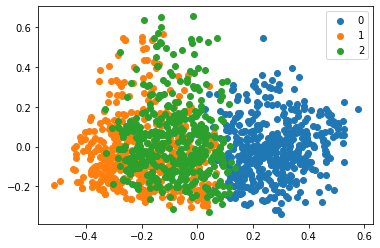

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()

In [20]:
 from sklearn.decomposition import PCA
import numpy as np


data = message_embeddings
pca = PCA(2)
 
#Transform the data
df_new = pca.fit_transform(data)

from sklearn.cluster import AgglomerativeClustering
 
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(df_new, n_neighbors=10, include_self=False)
model = AgglomerativeClustering(n_clusters=3, connectivity=connectivity, linkage='ward').fit(df_new) 


In [21]:
clusters = model.labels_.tolist()

In [22]:
model.labels_ 

array([0, 1, 0, ..., 0, 0, 1])

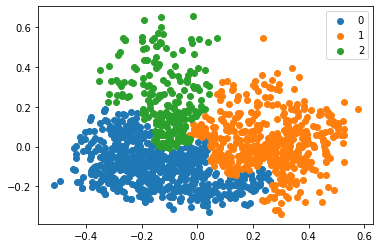

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

label = model.fit_predict(df_new)

u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()

Neural networks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


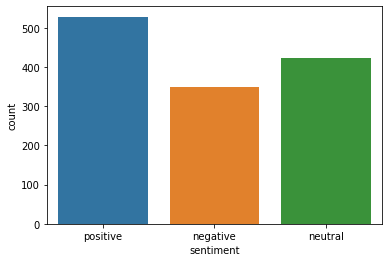

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(df['sentiment'])

In [25]:
df['text_length'] = df['text'].apply(len)

In [26]:
df.head()

,id,created_at,text,sentiment,text_length
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive,144
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,274
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,222
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive,140
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,129


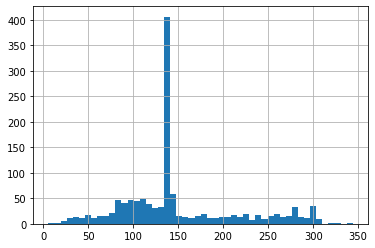

In [27]:
df['text_length'].hist(bins=50)
 

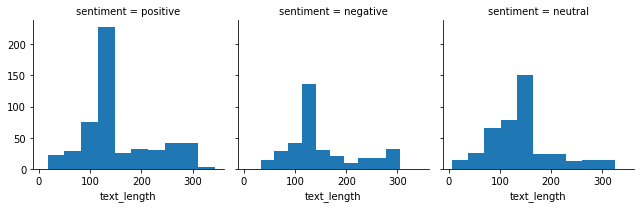

In [28]:
g = sns.FacetGrid(df,col='sentiment')
g.map(plt.hist,'text_length')

In [29]:
X = df['text']
y = pd.get_dummies(df['sentiment']).values
num_classes = df['sentiment'].nunique()

In [30]:
 from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, 
                                                    test_size=0.2,
                                                    random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1040,) (260,) (1040, 3) (260, 3)


In [31]:
from keras.preprocessing.text import Tokenizer
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

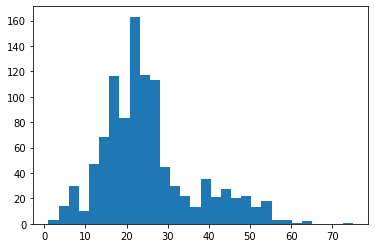

In [32]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 30)
plt.show()

In [33]:
from keras.preprocessing import sequence
max_words = 23
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(1040, 23) (260, 23)


In [34]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM, Flatten
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [35]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 23, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))    
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 

In [37]:
model_history = model.fit(X_train, Y_train,  epochs=10, batch_size=128, verbose=2, validation_split=0.2)
 

Epoch 1/10
7/7 - 9s - loss: 1.0928 - accuracy: 0.4147 - val_loss: 1.0897 - val_accuracy: 0.4087 - 9s/epoch - 1s/step
Epoch 2/10
7/7 - 0s - loss: 1.0765 - accuracy: 0.4147 - val_loss: 1.0908 - val_accuracy: 0.4087 - 448ms/epoch - 64ms/step
Epoch 3/10
7/7 - 1s - loss: 1.0682 - accuracy: 0.4147 - val_loss: 1.0923 - val_accuracy: 0.4087 - 528ms/epoch - 75ms/step
Epoch 4/10
7/7 - 0s - loss: 1.0539 - accuracy: 0.4147 - val_loss: 1.0919 - val_accuracy: 0.4087 - 415ms/epoch - 59ms/step
Epoch 5/10
7/7 - 1s - loss: 1.0221 - accuracy: 0.4147 - val_loss: 1.0840 - val_accuracy: 0.4087 - 598ms/epoch - 85ms/step
Epoch 6/10
7/7 - 0s - loss: 0.9499 - accuracy: 0.4375 - val_loss: 1.0856 - val_accuracy: 0.4231 - 479ms/epoch - 68ms/step
Epoch 7/10
7/7 - 1s - loss: 0.7878 - accuracy: 0.6298 - val_loss: 1.1344 - val_accuracy: 0.4712 - 533ms/epoch - 76ms/step
Epoch 8/10
7/7 - 1s - loss: 0.5938 - accuracy: 0.7103 - val_loss: 1.2650 - val_accuracy: 0.4760 - 571ms/epoch - 82ms/step
Epoch 9/10
7/7 - 1s - loss: 0

In [38]:
model.save('/content/drive/MyDrive/model_cnn_lstm') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model_cnn_lstm/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/model_cnn_lstm/assets


In [39]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/model_cnn_lstm')

In [40]:
y_pred = model.predict(X_test)


In [41]:
y_pred = y_pred.round() 

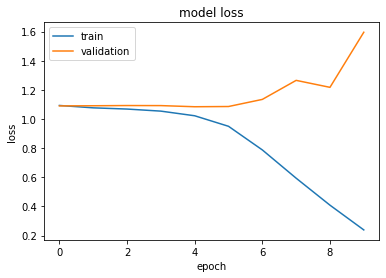

In [42]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

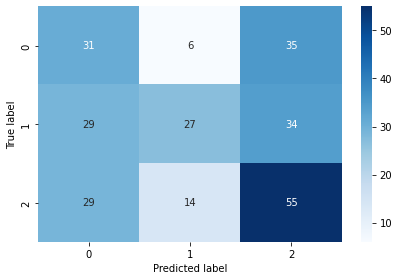

In [43]:
import seaborn as sns

confmat = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(y_pred,axis=1))

sns.heatmap(confmat,annot=True,cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [44]:
 from sklearn.metrics import classification_report
print(classification_report(np.argmax(Y_test,axis=1), np.argmax(y_pred,axis=1)))

              precision    recall  f1-score   support

           0       0.35      0.43      0.39        72
           1       0.57      0.30      0.39        90
           2       0.44      0.56      0.50        98

    accuracy                           0.43       260
   macro avg       0.46      0.43      0.42       260
weighted avg       0.46      0.43      0.43       260



In [45]:
texts = df['text']
matrix = []
for sentence in texts:
  words = sentence.split(" ")
  matrix.append(words)

In [46]:
matrix

[['RT',
  '@RobertBeadles:',
  'Yo💥\nEnter',
  'to',
  'WIN',
  '1,000',
  'Monarch',
  'Tokens✅\n\nUS',
  'Stock',
  'Market',
  'Crashes',
  '&amp;',
  'what',
  'we',
  'can',
  'LEARN',
  'from',
  'them',
  'PT3!\n\nRETWEET,',
  'WATCH',
  'video…'],
 ['#SriLanka',
  'surcharge',
  'on',
  'fuel',
  'removed!\n⛽📉\nThe',
  'surcharge',
  'of',
  'Rs.26',
  'imposed',
  'on',
  'diesel',
  'and',
  'petrol',
  'has',
  'been',
  'revoked',
  'with',
  'effect',
  'from',
  'midnight',
  'on',
  'June',
  '23',
  'says',
  'Power,',
  'Energy',
  'and',
  'Transport',
  'Minister',
  'Mahinda.',
  'Amaraweera',
  '-Adaderana-\n\n#lka',
  '#FuelPrices',
  '#taxes',
  '#economy',
  '#stocks',
  '#StockMarket'],
 ['Net',
  'issuance',
  'increases',
  'to',
  'fund',
  'fiscal',
  'programs',
  '&gt;',
  'yields',
  'spike',
  'higher',
  '&gt;',
  'risk',
  'off:',
  '#stocks',
  'and',
  '#EMFX',
  'correct',
  'lower',
  '&gt;',
  '#Fed',
  'comes',
  'in',
  'with',
  '#YCC',
  '&gt

XGBoost

In [47]:
#XGBoost model with bad accuracy

import numpy
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

dataset = df.values

X = dataset[:,0:3]
X = X.astype(str)
Y = dataset[:,3]

encoded_x = None
for i in range(0, X.shape[1]):
	label_encoder = LabelEncoder()
	feature = label_encoder.fit_transform(X[:,i])
	feature = feature.reshape(X.shape[0], 1)
	onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
	feature = onehot_encoder.fit_transform(feature)
	if encoded_x is None:
		encoded_x = feature
	else:
		encoded_x = numpy.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(encoded_x, label_encoded_y, test_size=test_size, random_state=seed)

model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

X shape: :  (1300, 3884)
XGBClassifier(objective='multi:softprob')
Accuracy: 41.03%


Sentiment analysis

In [85]:
df.head()

,id,created_at,text,sentiment,text_length,data_type
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",2,144,val
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,0,274,train
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,2,222,train
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,2,140,val
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,2,129,train


In [62]:
sentences = df.text.values

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                  df.sentiment.values, 
                                                  test_size=0.15, 
                                                  random_state=42,
                                                  stratify=df.sentiment.values)

In [64]:
df['data_type'] = ['not_set']*df.shape[0]

In [65]:
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

In [66]:
df.groupby(['sentiment', 'data_type']).count()

id  created_at  text  text_length
sentiment data_type                                    
0         train      296         296   296          296
          val         52          52    52           52
1         train      360         360   360          360
          val         64          64    64           64
2         train      449         449   449          449
          val         79          79    79           79

In [67]:
review_df = df[['text', 'sentiment']]
print(review_df.shape)
review_df.head()

(1300, 2)


,text,sentiment
0,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",2
1,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,0
2,Net issuance increases to fund fiscal programs...,2
3,RT @bentboolean: How much of Amazon's traffic ...,2
4,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,2


In [68]:
sentiment_label = review_df.sentiment.factorize()
sentiment_label

(array([0, 1, 0, ..., 2, 0, 1]), Int64Index([2, 0, 1], dtype='int64'))

In [70]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences)

In [71]:
encoded_docs = tokenizer.texts_to_sequences(sentences)

In [72]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
vocab_size = 25768
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 32)           824576    
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 841,227
Trainable params: 841,227
Non-trainable params: 0
________________________________________________

In [78]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)


Epoch 1/5
33/33 [==============================] - 16s 300ms/step - loss: 0.4663 - accuracy: 0.2692 - val_loss: 0.3491 - val_accuracy: 0.2577
Epoch 2/5
33/33 [==============================] - 8s 254ms/step - loss: 0.2813 - accuracy: 0.2702 - val_loss: 0.3244 - val_accuracy: 0.2577
Epoch 3/5
33/33 [==============================] - 8s 252ms/step - loss: 0.2506 - accuracy: 0.2702 - val_loss: 0.3174 - val_accuracy: 0.2577
Epoch 4/5
33/33 [==============================] - 8s 253ms/step - loss: 0.2315 - accuracy: 0.2702 - val_loss: 0.2822 - val_accuracy: 0.2577
Epoch 5/5
33/33 [==============================] - 9s 258ms/step - loss: -0.0338 - accuracy: 0.2827 - val_loss: 0.1310 - val_accuracy: 0.2731


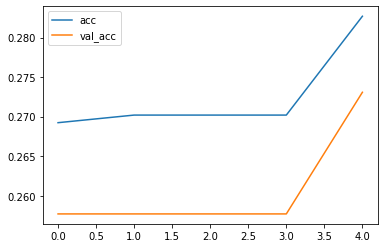

In [79]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

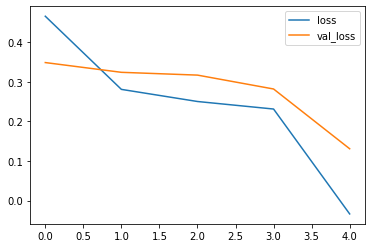

In [80]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [91]:
#Positive = 2, Negative = 0, Neutral = 1.

def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])
test_sentence1 = "#BTC is growing!!!"
predict_sentiment(test_sentence1)
test_sentence2 = "Stock market is bad"
predict_sentiment(test_sentence2)

Predicted label:  2
Predicted label:  0
